# How Racial Capitalism Persits today in Lexington, KY
## An exploration of 1930s Redlining Practices
This notebook covers the steps taken to collect and pre-process data for redlining-wealth-health-lexington github repo.

#### Table of Contents  
 - [Dependencies](#dependencies)
 - [Intro to US Census Bureau Data](#introUSCB)
 - [Intro to Lexington's Data Portal](#introLexData)
 - [Data to find & starting points](#dataStart)
 - [Inspiration for Maps](#inspiration)
 - [End of Day Thoughts](#endOfDay)

<a id='dependencies'></a>
## Dependencies

Required environment dependencies (actually loaded into environment):  
**jupyter notebook** conda install -c conda-forge jupyter  
**numpy** conda install -c conda-forge numpy  
**geopandas** conda install --channel conda-forge geopandas  
**pandas** (version 0.24 or later) conda install -c conda-forge pandas  
**shapely** (interface to GEOS) conda install -c conda-forge shapely  
**fiona** (interface to GDAL) conda install -c conda-forge fiona  
**matplotlib** (>=2.2.0) conda install -c conda-forge matplotlib  
**pyproj** (interface to PROJ; version 2.2.0 or later) conda install -c conda-forge pyproj

Further, optional dependencies (actually loaded into environment:  
**rtree** (optional; spatial index to improve performance and required for overlay operations; interface to libspatialindex) conda install -c conda-forge rtree  
**psycopg2**(optional; for PostGIS connection) conda install -c conda-forge psycopg2  
**GeoAlchemy2** (optional; for writing to PostGIS)conda install -c conda-forge geoalchemy2  
**geopy** (optional; for geocoding) conda install -c conda-forge geopy  

For plotting, these additional packages may be used:  
**mapclassify**(>=2.2.0)  

<a id='introUSCB'></a>
## Intro to US Census Bureau Data 
[Video](https://www.youtube.com/watch?v=1LZPYS0cR68) detailing how to access data for specific census tracts.  
Can find US Census data [here](https://mtgis-portal.geo.census.gov/arcgis/apps/MapSeries/index.html?appid=2566121a73de463995ed2b2fd7ff6eb7) on the 2020 Census Bureau Demographic Data Map Viewer OR [here](data.census.gov)

#### Data Hierarchy
Data within the US Census bureau is organized in a hierarchy of:
Nation-> State -> County -> Tract -> Block Group -> Block
Where a Nation is composed of many states which are composed of many counties etc..

Will need to use these sites to determine the exact census tracts for data interested in. 
Will most likely need use the tract name to merge or join tables.

[Census tracts and tract codes](https://transition.fcc.gov/form477/Geo/more_about_census_tracts.pdf)
[GEOIDS Specifics](https://www.census.gov/programs-surveys/geography/guidance/geo-identifiers.html)
- The decimal point separating the 4-digit basic tract code from the 2-digit suffix is shown in US Census Bureau printed reports and maps. However, in computer-readable files prepared by the Census Bureau decimal point is implied and does not appear. 
- A census tract code may not be used more than once in a single county, but it may be used again in a different county in the same state or in a county in a different state. Therefore must be identified by: its state, its county, and its tract code. 
- 11-digit code consisting of 
    - 2 digits for state (FIPS code)
    - 3 digits for county (FIPS code)
    - 6 digits for census tract 
    - All may have one or more leading 0's and two trailing 0's



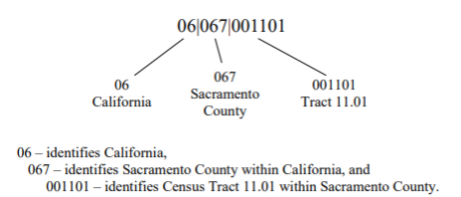

#### Where to find data
If using **data.census.gov**  
From here site click *advanced search* and select what filters to work through.  
This section of the site is great for a gui that allows you to quickly visualize data attribute tables and polygons on a map.

Geography example:  
Click advanced search-geography filter-select the hierarchy level wish to pull-state-county-within (tract)  
To only pull data from 2020 census click on year filter and select year of interest  
To only pull data from specific census click on surveys filter and select survey of interest  
Click search (data tables resulting from these filters will populate)  
Can then either download the table in csv or look in map format  

For example I chose  
advanced search-geography-block-kentucky-fayette-all blocks within fayette county  

Another option (great for knowing specific topic of interest but not the name of the precise survey needed to view in gui from above site.) use **census.gov/data.html**  
From here click browse by topic, search in search bar with simple terms to find correct abbreviation of interest then return to data.census.gov and search for abbreviation of interest (example: DP04 or S1901) and refine as described above.  

#### Promising Surveys  
**DP4 Profile of Selected Housing Characteristics: 2000** Decennial Survey (since this is older data will try to utilize DP04 instead).  
**DP04 Selected Housing Characteristics (2019: ACS American Community Survey 5 year estimates data profiles**   
Housing units, Structure type, year built, number of rooms, year householder moved into unit (establish long term owners), vehicles, house heating, *specified owner occupying units value vs renter units*, *value owner-occupied units*, *gross rent*, *gross rent as % of household income*  
**DP02 Selected Social Characteristics in the United States (2019: ACS 5-Year Estimates Data Profiles**  
Educational attainment, Disability status, residence length, with a computer, with broadband internet
**S1701 Poverty Status in the past 12 months (ACS)**  
Estimate of total number of people for whom poverty status was determined (poverty or not) with below poverty level numbers calculated per census tract.  
**S1901 Income in the past 12 months (in 2019 inflation-adjusted dollars)**  
Household income range, Median income  

<a id='introLexData'></a>
## Intro to Lexington's Data Portal
Lexington has some data already configured in their own archub data portal gui to demo files from some census tract work and past work provided by other private uploaders to the site. Some potential data sets of interest to begin with are below. If I persue further information regaring health or access to certain spaces I may return to this data. Currently looking to pull most data from Census Bureau.
https://data-lfucg.hub.arcgis.com/

**GOOD DATA FILE for neighborhoods but no common ground to merge.**
Census 2020 by Race for 18 and Over by Preceinct in geoJSON format accessed 1/27/2022 from [here](https://data-lfucg.hub.arcgis.com/datasets/a1e93b1a225a4bb79baa00190e2b212c_0/explore?location=38.029745%2C-84.464568%2C13.69)

This is an alternative option to finding census tracts as they should be included in this geojson from 2020 census.
This data set containes the names of the neighborhoods.
This data set also uses a unique change in identification. In 2020 there was an option to identify as more than one race (multiracial). Will need to consider this when exploring the race make up of the precincts. Can use the dominate identifiers or be more specific i.e. white vs black or african american vs *race 1 and race 2*

Would like to know what CODE stands for, example CODE C129 and NAME IDLE HOUR. is C129 part of a precinct number? 

[**GOOD DATA FILE for Census Tracts 2010**](https://data-lfucg.hub.arcgis.com/datasets/6cb9e8be350d45d19f1e517d2e9c4e4b_0/explore?location=38.041424%2C-84.451398%2C12.05) Good example of tract number identification from 2010 census tracts.
It would appear **NAME10** on Census Tract 2010 corresponds to **BASENAME** for Census Tract in US Census Bureau 2019 census. Caveat in using this data is it's dated. Should find more up to date data file.

[**GOOD DATA FILE for Census Tracts & Race**](https://data-lfucg.hub.arcgis.com/datasets/8c1d1363e6ce4822b818a51469f4f502_0/explore)
Census 2020 Precinct_p1_race

[**GOOD DATA FILE for Landuse (Vacancies)**](https://data-lfucg.hub.arcgis.com/datasets/8113df2403c048a0837a0bec68906f3a_0/explore?filters=eyJMVTIwMDUiOlsiU0YiLCJNRiIsIkQiLCJDT00iLCJWQUMiXX0%3D&location=38.031300%2C-84.466517%2C13.19)
Only issue is that the landuse may be from 2005.

[**Good DATA FILE for Parks**](https://data-lfucg.hub.arcgis.com/datasets/764044274e974dbba9069d9dab7dcb34_0/explore?location=38.037063%2C-84.482212%2C13.06)
Park type, acreage. Need to check and see if this is more up to date than the previous park project completed in lex_redlined_and_parks personal repo

[**Property values Option B**](https://qpublic.schneidercorp.com/Application.aspx?AppID=1019&LayerID=21445&PageTypeID=4&PageID=9143&Q=1076636217&KeyValue=40100350)
allowed 100 free look ups first month
each additional month 50 free look ups.
could limit the look ups to one holc a and one holc d? 

[**Occupancy Status by Precinct Census 2020**](https://data-lfucg.hub.arcgis.com/datasets/4ce0a61b95764366a1971f5960a10690_0/explore?location=38.028065%2C-84.471929%2C13.69)
Occupied vs vacant reported properties

[**Greenway**](https://data-lfucg.hub.arcgis.com/datasets/79605c14aebf4bbb98c6df79c6e539ec_0/explore?location=38.022719%2C-84.458785%2C16.91)
acreage of greenspace 

[**Railway**](https://data-lfucg.hub.arcgis.com/datasets/7671e2d17391430ebca3e88e547a0cb0_0/explore?location=38.056548%2C-84.478677%2C13.08)
line work for railways in lex

Impervious Area 2007 (private upload can download as shapefile)
Tree Canopy (private upload can download as shapefile)

Other data sets of interest for another day:
Various school zones (districts?)
Library
Bicycle Network

<a id='dataStart'></a>
## Data Used
It does appear the US Census Bureau will be releasing their 2020 data come Mid March. Possible idea would be to revisit this project with updated data come April.

#### Links to Data
- HOLC Graded Neighborhood Polygons
    - [Mapping Inequality Redlining in New Deal America](https://dsl.richmond.edu/panorama/redlining/#loc=14/38.041/-84.526&city=lexington-ky&text=downloads)
        - Shapefile or GeoJSON
        - Georectified Image
        - Scan jpg
        - Citation: Robert K. Nelson, LaDale Winling, Richard Marciano, Nathan Connolly, et al., “Mapping Inequality,” American Panorama, ed. Robert K. Nelson and Edward L. Ayers, accessed February 2, 2022, https://dsl.richmond.edu/panorama/redlining/#loc=14/38.041/-84.526&city=lexington-ky&text=downloads.
- Race/Segregation 
    - [*Race for the Population 18 years+ 2020*](https://data.census.gov/cedsci/table?q=p3&t=Race%20and%20Ethnicity&g=0500000US21067%241400000&y=2020)
    - Data available to download in:
        - CSV metadata
        - CSV file data
        - TXT file table title
        - Accessed: 8 Feb 2022
        - Citation:
        - Notes: Census Data utilized was for those identifying as a Population of one race. Options to declare included White alone, Black or African American alone, American Indian and Alaska Native alone, Asian alone, Native Hawaiian and Other Pacific Islander Alone, Some Other Race alone. Additional options existed to self declare population of 2 or more races. Only selected data for populations identifying as a single race either White alone OR Black or African American alone. This was selected as identifying as a single race white or Black was the purpose of exploration in relation to HOLC 1930s neighborhood identifications.
- Median Household income
    - [*S1901 Income in the past 12 months (in 2019 inflation-adjusted dollars)*](https://data.census.gov/cedsci/table?q=income&g=0500000US21067%241400000&y=2019)
    - CSV file type includes: 
        - CSV file metadata
        - CSV file data
        - TXT file table title
        - 19.4 kb
        - Accessed: 
        - Citation:
- % of population in poverty 
    - [*S1701 Poverty Status in the past 12 months (ACS)*](https://data.census.gov/cedsci/table?q=s1701&g=0500000US21067%241400000&y=2019)
    - [Symbols](https://www.census.gov/data/tables/time-series/demo/income-poverty/cps-pov/pov-01.2019.html#par_textimage_9999998) used in tables: 
        - (B) Base less than 75,000
        - (X) Estimate is not applicabple or not available
        - (Z) Rounds to zero
    - CSV File type includes:
        - CSV File Metadata
        - CSV file data
        - TXT file table title
        - 59.7 kb
        - Accessed: 
        - Citation: 
- Mortgage approval rates through time (HMDA home mortgage disclosure act data, by census tract number, race of applicant, not sure if approvals/denials within large data set too large to open in excel)
    - ?????????
- Census Tracts for mapping!!!!
    - ?????????
- Percent homeownership today 
    - [*US census bureau American Community Survey DP04 2019*](https://data.census.gov/cedsci/table?q=DP04&g=0500000US21067%241400000)
    - CSV File type includes:
        - CSV file metadata
        - CSV file data
        - TXT file table title
        - 88.5 kb
        - Accessed: 
        - Citation:
- Property values today
    - [*US census bureau American Community Survey DP04 2019*](https://data.census.gov/cedsci/table?q=DP04&g=0500000US21067%241400000) has owner reported value of house in range
    - CSV File type includes:
        - CSV file metadate
        - CSV file data
        - TXT file table title
        - 88.5 kb (but will have already downloaded for percent ownership today)
        - Accessed:
        - Citation:
- Quality of property 
    - NLCD Tree Land Cover data set? or tree coverage from lex
    - impervious surface coverage from LEX
    - distance to park (ref previous project)
    - vacant lots nearby
    - nearby railroad
- Timeline (Journal articles to reference history and development of Lexington)
    - May use images from journal articles for demo. Articles of interest:
        - Kellogg, John. 1982. The Formation of Black Residential Areas in Lexington, Kentucky 1865-1887. Southern Historical Association. Vol 48. No 1. pp. 21-52.
        - O'Malley, Nancy. 2002. The Pursuit of Freedom The Evolution of Kinkeadtown, an African American Post-Civil War Neighborhood in Lexington, Kentucky. Winterthur Portfolio. Vol 37. No. 4. pp. 187-218.
        - Rabinowitz, Howard. 1976. From Reconstruction to Redemption in the Urban South. Journal of Urban History. Vol 2. No 2. pp 169-194
        - Kellogg, John. 1977. Negro Urban Clusters in the Posbellum South. Geographical Review. Vol 67. No 3. pp. 310-321.
        - Kendi, Ibram. 2016. Stamped from the Beginning The Definitive History of Racist Ideas in America. New York, Bold Type Books. pp 583. 


<a id='inspiration'></a>
## Inspiration for Maps
- [ramp styling 2020 census by race](https://mtgis-portal.geo.census.gov/arcgis/apps/MapSeries/index.html?appid=2566121a73de463995ed2b2fd7ff6eb7)
- [overalp of holc designations & secondary ramp map](https://mtgis-portal.geo.census.gov/arcgis/apps/MapSeries/index.html?appid=2566121a73de463995ed2b2fd7ff6eb7)

<a id='endOfDay'></a>
### End of Day Thoughts:
Items to consider at a later date.
*Determine what years data is available for interest, then select correct census tract that best corresponds to these. (It appears the latest data is 2019 with the exception that come Mid March new 2020 census data will be released from US Census Bureau)
*Would be interesting to look at impervious surfaces vs tree canopy as a way to analyse simple pleasure of green. look for the demarcation of affluent areas by satellite? or aerial imagery (inspiration Bunge 2011 from map719) green grass on a colored aerial photograph almost perfectly maps the territory of the affluent-their campuses, expressways, downtown business center, parks, and homes. The affluent are surrounded by private parks.   

# Exploring Data Sets

In [17]:
# load require packages for exploring spatial data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Race/Segregation Data

In [18]:
# Load CSV data as pandas DataFrame
race_df = pd.read_csv('./data/race_pop_18up_2020.csv')

In [19]:
#Verify race_df now references pandas DataFrame object, not CSV file
type(race_df)

pandas.core.frame.DataFrame

In [26]:
# get an idea for starting place of information
race_df.info()

#83 individual entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 73 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   GEO_ID   83 non-null     object
 1   NAME     83 non-null     object
 2   P3_001N  83 non-null     object
 3   P3_002N  83 non-null     object
 4   P3_003N  83 non-null     object
 5   P3_004N  83 non-null     object
 6   P3_005N  83 non-null     object
 7   P3_006N  83 non-null     object
 8   P3_007N  83 non-null     object
 9   P3_008N  83 non-null     object
 10  P3_009N  83 non-null     object
 11  P3_010N  83 non-null     object
 12  P3_011N  83 non-null     object
 13  P3_012N  83 non-null     object
 14  P3_013N  83 non-null     object
 15  P3_014N  83 non-null     object
 16  P3_015N  83 non-null     object
 17  P3_016N  83 non-null     object
 18  P3_017N  83 non-null     object
 19  P3_018N  83 non-null     object
 20  P3_019N  83 non-null     object
 21  P3_020N  83 non-null     object
 22  P3_0

In [21]:
# Initial Look at data with first 5 rows
race_df.head(5)

,GEO_ID,NAME,P3_001N,P3_002N,P3_003N,P3_004N,P3_005N,P3_006N,P3_007N,P3_008N,P3_009N,P3_010N,P3_011N,P3_012N,P3_013N,P3_014N,P3_015N,P3_016N,P3_017N,P3_018N,P3_019N,P3_020N,P3_021N,P3_022N,P3_023N,P3_024N,P3_025N,P3_026N,P3_027N,P3_028N,P3_029N,P3_030N,P3_031N,P3_032N,P3_033N,P3_034N,P3_035N,P3_036N,P3_037N,P3_038N,P3_039N,P3_040N,P3_041N,P3_042N,P3_043N,P3_044N,P3_045N,P3_046N,P3_047N,P3_048N,P3_049N,P3_050N,P3_051N,P3_052N,P3_053N,P3_054N,P3_055N,P3_056N,P3_057N,P3_058N,P3_059N,P3_060N,P3_061N,P3_062N,P3_063N,P3_064N,P3_065N,P3_066N,P3_067N,P3_068N,P3_069N,P3_070N,P3_071N
0,id,Geographic Area Name,!!Total:,!!Total:!!Population of one race:,!!Total:!!Population of one race:!!White alone,!!Total:!!Population of one race:!!Black or A...,!!Total:!!Population of one race:!!American I...,!!Total:!!Population of one race:!!Asian alone,!!Total:!!Population of one race:!!Native Haw...,!!Total:!!Population of one race:!!Some Other...,!!Total:!!Population of two or more races:,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two 

In [22]:
# Confirm seeing all columns
pd.options.display.max_columns = None
# Initial Look at data
race_df.head(5)

,GEO_ID,NAME,P3_001N,P3_002N,P3_003N,P3_004N,P3_005N,P3_006N,P3_007N,P3_008N,P3_009N,P3_010N,P3_011N,P3_012N,P3_013N,P3_014N,P3_015N,P3_016N,P3_017N,P3_018N,P3_019N,P3_020N,P3_021N,P3_022N,P3_023N,P3_024N,P3_025N,P3_026N,P3_027N,P3_028N,P3_029N,P3_030N,P3_031N,P3_032N,P3_033N,P3_034N,P3_035N,P3_036N,P3_037N,P3_038N,P3_039N,P3_040N,P3_041N,P3_042N,P3_043N,P3_044N,P3_045N,P3_046N,P3_047N,P3_048N,P3_049N,P3_050N,P3_051N,P3_052N,P3_053N,P3_054N,P3_055N,P3_056N,P3_057N,P3_058N,P3_059N,P3_060N,P3_061N,P3_062N,P3_063N,P3_064N,P3_065N,P3_066N,P3_067N,P3_068N,P3_069N,P3_070N,P3_071N
0,id,Geographic Area Name,!!Total:,!!Total:!!Population of one race:,!!Total:!!Population of one race:!!White alone,!!Total:!!Population of one race:!!Black or A...,!!Total:!!Population of one race:!!American I...,!!Total:!!Population of one race:!!Asian alone,!!Total:!!Population of one race:!!Native Haw...,!!Total:!!Population of one race:!!Some Other...,!!Total:!!Population of two or more races:,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two 

In first glance we won't need all of the columns within the dataframe. 
- Need to reduce to only those of interest. 
    - Keep the following (and rename):
        - Total = **P3_001N**
        - Total: Population of one Race: White alone = **P3_003N**
        - Total: Population of one Race: Black or African American alone = **P3_004N**
    - Drop the following:
        - **P3_002N, P3_005N:P3_071N**
- Will also need to include a note in analysis that all other races were not considered as this was an exploration only of the White and Black populations (represented as a single race). Prior to 2020 I don't believe multiple race identification was included on the census?
- Need to reduce to only census tracts of interest, though this may be easier accomplished once mapped to know which to keep.

#### Drop a Feature/Column

In [23]:
# To Drop Columns
to_drop = ['P3_002N', 'P3_005N', 'P3_006N','P3_007N','P3_008N','P3_009N','P3_010N','P3_011N','P3_012N','P3_013N','P3_014N',
          'P3_015N','P3_016N','P3_017N','P3_018N', 'P3_019N', 'P3_020N', 'P3_021N', 'P3_022N', 'P3_023N', 'P3_024N', 'P3_025N',
          'P3_026N', 'P3_027N','P3_028N', 'P3_029N', 'P3_030N', 'P3_031N', 'P3_032N', 'P3_033N', 'P3_034N', 'P3_035N',
          'P3_036N', 'P3_037N','P3_038N', 'P3_039N', 'P3_040N', 'P3_041N', 'P3_042N', 'P3_043N', 'P3_044N', 'P3_045N',
          'P3_046N', 'P3_047N','P3_048N', 'P3_049N', 'P3_050N', 'P3_051N', 'P3_052N', 'P3_053N', 'P3_054N', 'P3_055N',
          'P3_056N', 'P3_057N','P3_058N', 'P3_059N', 'P3_060N', 'P3_061N', 'P3_062N', 'P3_063N', 'P3_064N', 'P3_065N',
          'P3_066N', 'P3_067N','P3_068N', 'P3_069N', 'P3_070N', 'P3_071N' ] #columns to drop

# drop excess columns from dataframe
# assign remaining data to new dataframe name
race_bw_df = race_df.drop(to_drop, axis=1)


In [24]:
# Confirm column/feature drops
race_bw_df.head(5)

,GEO_ID,NAME,P3_001N,P3_003N,P3_004N
0,id,Geographic Area Name,!!Total:,!!Total:!!Population of one race:!!White alone,!!Total:!!Population of one race:!!Black or A...
1,1400000US21067000101,"Census Tract 1.01, Fayette County, Kentucky",2781,1916,492
2,1400000US21067000102,"Census Tract 1.02, Fayette County, Kentucky",1339,991,262
3,1400000US21067000200,"Census Tract 2, Fayette County, Kentucky",2709,1790,708
4,1400000US21067000300,"Census Tract 3, Fayette County, Kentucky",2227,971,1004


In [27]:
# look at basic statistics
race_bw_df.describe()

,GEO_ID,NAME,P3_001N,P3_003N,P3_004N
count,83,83,83,83,83
unique,83,83,82,82,79
top,id,Geographic Area Name,2036,2518,126
freq,1,1,2,2,2


#### Rename Columns & Remove Row Identifier

In [28]:
# Rename Columns

race_bw_df.rename(columns = {'NAME':'Census Tract','P3_001N':'Total', 'P3_003N':'White Alone', 'P3_004N':'Black Alone'}, inplace=True)

In [29]:
race_bw_df.head(5)

,GEO_ID,Census Tract,Total,White Alone,Black Alone
0,id,Geographic Area Name,!!Total:,!!Total:!!Population of one race:!!White alone,!!Total:!!Population of one race:!!Black or A...
1,1400000US21067000101,"Census Tract 1.01, Fayette County, Kentucky",2781,1916,492
2,1400000US21067000102,"Census Tract 1.02, Fayette County, Kentucky",1339,991,262
3,1400000US21067000200,"Census Tract 2, Fayette County, Kentucky",2709,1790,708
4,1400000US21067000300,"Census Tract 3, Fayette County, Kentucky",2227,971,1004


In [30]:
# Drop Row 0 with excess info now that column headers reflect this information
race_bw_df.drop([0])

#confirm dropped one row as 82 of the original 83 rows exist

,GEO_ID,Census Tract,Total,White Alone,Black Alone
1,1400000US21067000101,"Census Tract 1.01, Fayette County, Kentucky",2781,1916,492
2,1400000US21067000102,"Census Tract 1.02, Fayette County, Kentucky",1339,991,262
3,1400000US21067000200,"Census Tract 2, Fayette County, Kentucky",2709,1790,708
4,1400000US21067000300,"Census Tract 3, Fayette County, Kentucky",2227,971,1004
5,1400000US21067000400,"Census Tract 4, Fayette County, Kentucky",1288,524,587
...,...,...,...,...,...
78,1400000US21067004205,"Census Tract 42.05, Fayette County, Kentucky",5445,4711,168
79,1400000US21067004207,"Census Tract 42.07, Fayette County, Kentucky",2968,2518,82
80,1400000US21067004208,"Census Tract 42.08, Fayette County, Kentucky",5729,4257,134
81,1400000US21067004209,"Census Tract 42.09, Fayette County, Kentucky",2991,2606,111


In [34]:
#exploring Lexingtons 2020 Census data by Race
%matplotlib inline

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import mapping
import shapely.speedups # can help speed up processes
import matplotlib.pyplot as plt
import timeit

# change default figsize
plt.rcParams['figure.figsize'] = (15, 12)

Import data locally and examine amount of time to do so.

Still to do:
*Clip all data to within new circle of lexington? Don't need the excessive amount of data loads for the entire county when just wanting to compare holc grades?
*Open the home mortgage disclosure act to explore what attributes are within.     
*Overlay census tracts with redlining geoJSON to determine what tracts to pull (quick viz from past QGIS lex_parks project)  
*Find HOLC descriptions for individual grade blocks example D3 or D4 and the exact quote text they use to describe that block
*With every data download from Lexingtons Data portal need to pull the terms of use.  